In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Load dataset
df = pd.read_csv('Tema_7.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2.0,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [5]:
#Number of rows
len(df)

450

In [6]:
#Nulls
null_values = df.isna()
porcentages = (null_values.sum() / len(df) * 100)
porcentages

Channel             5.111111
Region              4.888889
Fresh               4.666667
Milk                4.888889
Grocery             4.888889
Frozen              5.111111
Detergents_Paper    4.888889
Delicassen          5.111111
dtype: float64

In [7]:
df['Channel'].value_counts(dropna=False)
# 1.0 -> Horeca (hotel, restaurants, café)
# 2.0 -> Retail

Channel
1.0    289
2.0    138
NaN     23
Name: count, dtype: int64

In [8]:
df.loc[df['Channel'].isna() == True, 'Channel'] = 1.0 # Reemplazo por la moda

In [9]:
df['Region'].value_counts(dropna=False)
# 3.0 -> Other region
# 1.0 -> Lisbon
# 2.0 -> Oporto

Region
3.0    308
1.0     75
2.0     45
NaN     22
Name: count, dtype: int64

In [10]:
df.loc[df['Region'].isna() == True, 'Region'] = 3.0 # Reemplazo por la moda

In [11]:
#Change 'invalid_value' to NaN
df.loc[df['Fresh']== 'invalid_value', 'Fresh'] = np.nan
df['Fresh'] = pd.to_numeric(df['Fresh'], errors='coerce')

In [12]:
for column in ["Fresh" ,"Milk","Grocery","Frozen" ,"Detergents_Paper","Delicassen"]:
    df.loc[df[column].isna() == True, column] = df[column].median() # Reemplazo nulls por mediana de las columnas numéricas
#Uso la mediana porque tienen un rango muy grande y outliers

In [13]:
def plot_column(column):

    # Plot de la columna
    plt.figure(figsize=(8, 6))
    df[column].hist(bins=100)
    plt.title(f'Gráfico de {column}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.grid(True)
    plt.show()
    # Cálculo de estadísticas
    mean = df[column].mean()
    std = df[column].std()
    min_value = df[column].min()
    max_value = df[column].max()
    
    print(f"Media: {mean}")
    print(f"Desviación estándar: {std}")
    print(f"Valor mínimo: {min_value}")
    print(f"Valor máximo: {max_value}")

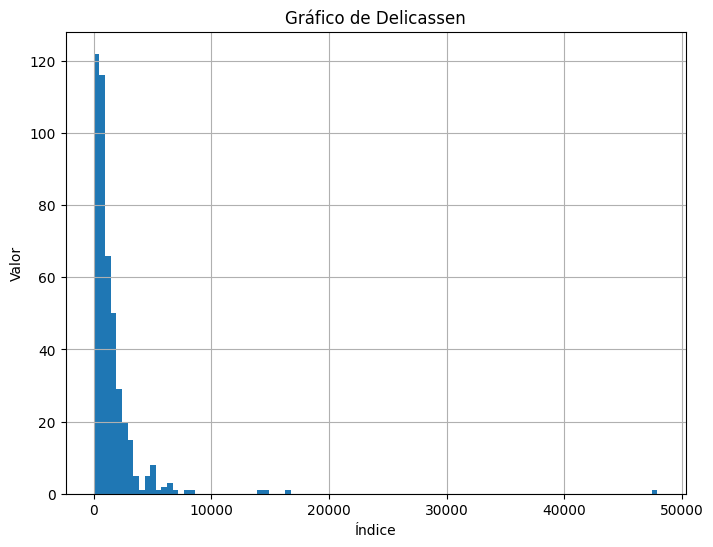

Media: 1504.3955555555556
Desviación estándar: 2787.80344821949
Valor mínimo: 3.0
Valor máximo: 47943.0


In [14]:
plot_column('Delicassen') #Se puede cambiar el nombre de la columna para ver el hist

In [15]:
df[df['Frozen']>30000] # Hay que ver si sacarlos o no, si son outliers o no

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
93,1.0,3.0,11314.0,3090.0,2062.0,35009.0,71.0,2698.0
325,1.0,2.0,32717.0,16784.0,13626.0,60869.0,1272.0,5609.0


In [16]:
df[df['Fresh']>=1121510] #Estos tienen pinta de outliers porque los 4 tienen 112151
fresh_stats = df['Fresh'].describe() #Estadísticas de la columna Fresh

#Cálculo de los cuartiles
Q1 = fresh_stats['25%'] #Cuartil 1
Q3 = fresh_stats['75%'] #Cuartil 3
IQR = Q3 - Q1 #Rango intercuartílico, esto es la diferencia entre el cuartil 3 y el cuartil 1
#Cálculo de los límites
lower_limit = Q1 - 3 * IQR
upper_limit = Q3 + 3 * IQR
#Cálculo de los outliers
outliers = df[(df['Fresh'] < lower_limit) | (df['Fresh'] > upper_limit)]
Q1

3355.5

In [17]:
df[df['Milk']>=500000] #Estos tienen pinta de outliers porque los 5 tienen 734980

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,2.0,3.0,22925.0,734980.0,32114.0,987.0,20070.0,903.0
209,2.0,3.0,5550.0,734980.0,16767.0,864.0,12420.0,797.0
266,2.0,1.0,572.0,734980.0,22182.0,2221.0,4882.0,2563.0
296,1.0,2.0,19087.0,734980.0,927800.0,3045.0,710.0,898.0
440,2.0,3.0,22925.0,734980.0,32114.0,987.0,20070.0,903.0


In [18]:
df[df['Grocery']>=800000] #Estos tienen pinta de outliers porque los 5 tienen 927800

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6,2.0,3.0,12126.0,3199.0,927800.0,480.0,3140.0,545.0
197,2.0,1.0,2427.0,7097.0,927800.0,1127.0,4314.0,1468.0
296,1.0,2.0,19087.0,734980.0,927800.0,3045.0,710.0,898.0
430,1.0,3.0,3097.0,4230.0,927800.0,1504.0,241.0,2080.0


In [19]:
df[df['Detergents_Paper']>30000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
85,2.0,3.0,16117.0,46197.0,92780.0,1026.0,40827.0,2944.0
333,2.0,2.0,8565.0,4980.0,67298.0,131.0,38102.0,1215.0


In [20]:
df[df['Delicassen']>40000]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
183,1.0,3.0,36847.0,43950.0,20170.0,1504.0,239.0,47943.0


In [22]:
#Normalizar las variables
from sklearn.preprocessing import StandardScaler
# Se inicializa el escalador MinMax
scaler = StandardScaler()

for column in ["Fresh" ,"Milk","Grocery","Frozen" ,"Detergents_Paper","Delicassen"]:
    # Se normalizan los datos de la columna
    normalized_column = scaler.fit_transform(df[[column]])
    # Se agregan los datos normalizados al dataframe original
    df[column] = normalized_column

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,-0.085343,-0.052482,-0.097281,-0.598786,-0.020063,-0.059753
1,2.0,3.0,-0.138850,-0.050475,-0.074174,-0.255764,0.109705,0.097534
2,2.0,3.0,-0.145562,-0.063532,-0.095864,-0.113282,0.156455,2.276581
3,1.0,3.0,-0.079660,-0.162726,-0.135734,0.772859,-0.474355,0.101844
4,2.0,3.0,0.009486,-0.107813,-0.101460,0.221320,-0.208111,1.321722



##### ¿Cómo varía el gasto anual promedio entre las diferentes regiones (Lisbon, Oporto y otras)? Utilizar un gráfico de barras para mostrar el gasto promedio en cada categoría por región, facilitando la comparación de patrones de consumo.

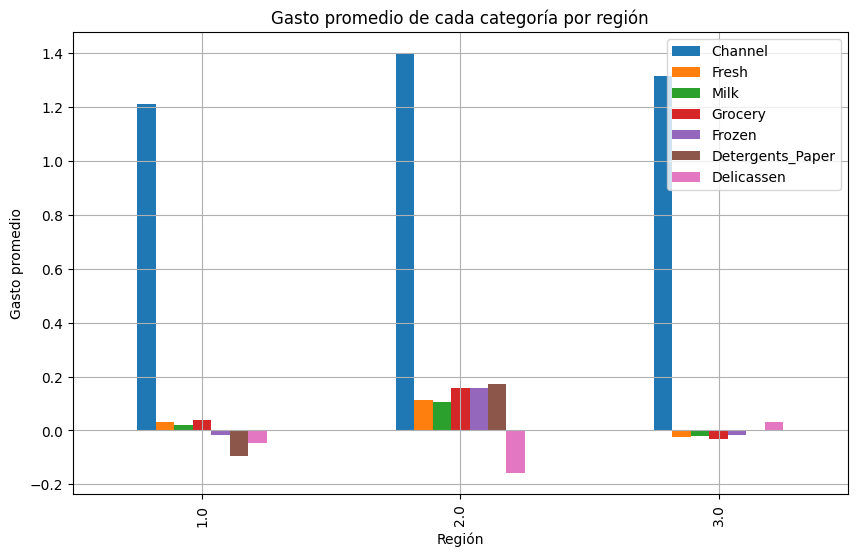

In [23]:
#Graficar el gasto promedio de cada categoría por región
grouped = df.groupby('Region').mean()

grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Gasto promedio de cada categoría por región')
plt.ylabel('Gasto promedio')
plt.xlabel('Región')
plt.grid(True)
plt.show()


##### ¿Existen diferencias significativas en el gasto anual entre los canales (Horeca y Retail)? Comparar el gasto en cada categoría según el canal usando un gráfico de barras o boxplot para resaltar diferencias en patrones de consumo entre Horeca y Retail.


##### ¿Cómo se distribuye el gasto en productos frescos en relación con otros productos? Crear un gráfico de dispersión (scatter plot) comparando FRESH con cada una de las otras categorías, para analizar si existe correlación entre el gasto en productos frescos y otras categorías.

##### ¿Cuál es la proporción de gasto en cada categoría de productos en cada región? Usar un gráfico de pastel o un gráfico de áreas apiladas para representar la proporción de cada categoría en el gasto total por región.

##### ¿Cuál es la distribución del gasto anual en cada categoría de productos? Crear un histograma o boxplot para cada categoría (FRESH, MILK, GROCERY, FROZEN, DETERGENTS_PAPER, DELICATESSEN) para visualizar la dispersión del gasto y detectar posibles outliers.

##### ¿Qué región tiene una mayor proporción de clientes en Horeca vs. Retail? Visualizar la frecuencia de clientes por canal y región con un gráfico de barras apiladas o un mosaico para analizar el predominio de Horeca o Retail en cada región.

##### ¿Existen correlaciones entre las categorías de gasto? Crear una matriz de correlación con un heatmap para observar las relaciones entre las distintas categorías de productos y detectar patrones de consumo.

##### ¿Cómo varía el gasto en Delicatessen entre regiones y canales? Comparar el gasto promedio en Delicatessen para cada combinación de región y canal usando un gráfico de barras o un boxplot, para explorar diferencias en este tipo de productos.

##### ¿Cuál es la variación del gasto promedio en productos de cada tipo en función de la desviación estándar? Representar la media y la desviación estándar de cada categoría en un gráfico de barras para visualizar el nivel de variabilidad de cada tipo de producto.

In [155]:
# Gasto promedio anual por región

